In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import KMeans

In [4]:
df=pd.read_excel('Centroid Training Data.xlsx')

In [5]:
df.head()

,FPC Time,TeleCast Time,Event Name,Job ID,Duration,SOM,Segment,Spot Type,RODP Deal Category,Agency,Client,Brand,Language,BookingNumber,Spot Rate,Commercial Duration,Telecast Date,Breakwise Commercial Total,Product
0,00:00:00,23:58:00,DR. MUNIR KHAN_SLOT _EP_S1,1006,00:30:00:00,00:00:00:00,1.0,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02:30:05:00,2018-12-16,NaN,NaN
1,NaN,00:28:00,Disclaimer,c002535,00:00:05:00,00:00:00:00,NaN,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-16,NaN,NaN
2,NaN,00:28:05,UMMID EP 1 30 MIN,N013937,00:30:00:00,00:00:00:00,NaN,C,NaN,STAR MEDIA COMMUNICATION,DR. MUNIR KHAN,DR MUNIR KHAN,HINDI,18081350N,9500.0,NaN,2018-12-16,NaN,SLOT
3,NaN,00:58:05,UMMID EP 2 30 MIN,N013938,00:30:00:00,00:00:00:00,NaN,C,NaN,STAR MEDIA COMMUNICATION,DR. MUNIR KHAN,DR MUNIR KHAN,HINDI,18081350N,9500.0,NaN,2018-12-16,NaN,SLOT
4,NaN,01:28:05,UMMID EP 3 30 MIN,N013939,00:30:00:00,00:00:00:00,NaN,C,NaN,STAR MEDIA COMMUNICATION,DR. MUNIR KHAN,DR MUNIR KHAN,HINDI,18081350N,9500.0,NaN,2018-12-16,NaN,SLOT


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 19 columns):
FPC Time                      42 non-null object
TeleCast Time                 1139 non-null object
Event Name                    1139 non-null object
Job ID                        1139 non-null object
Duration                      1139 non-null object
SOM                           1139 non-null object
Segment                       82 non-null float64
Spot Type                     1139 non-null object
RODP Deal Category            1044 non-null object
Agency                        1052 non-null object
Client                        1052 non-null object
Brand                         1052 non-null object
Language                      1052 non-null object
BookingNumber                 1052 non-null object
Spot Rate                     1052 non-null float64
Commercial Duration           65 non-null object
Telecast Date                 1139 non-null datetime64[ns]
Breakwise Commercial T

In [9]:
maxsp=df['Spot Rate'].max()
minsp=df['Spot Rate'].min()

In [10]:
normalize = lambda x : x/maxsp-minsp

In [11]:
maxsp

5000.0

In [6]:
df = df.dropna(axis=0, subset=['Spot Rate'])

C:\Users\Joel\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


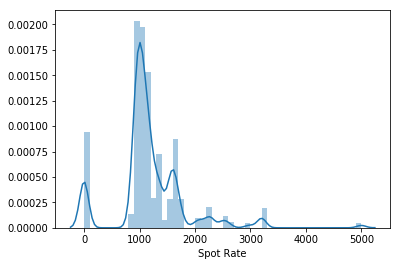

In [12]:
sns.distplot(df['Spot Rate'], 50, True)

In [13]:
KMeanCentres=np.array([1/6,0.5,5/6])

In [14]:
kmeans=KMeans(3,'k-means++',15,300)

In [15]:
spotrate=np.array(normalize(df['Spot Rate']))
spotrate=spotrate.reshape(-1,1)
pred=kmeans.fit(spotrate)

In [16]:
centspr=kmeans.cluster_centers_
centpri=KMeanCentres

In [17]:
Priority=np.arange(1,9)    

In [18]:
CentCoord=np.ones((9,2),dtype=np.complex_)
a=0
for i in centpri:
    for j in centspr:
        CentCoord[a][0]=i
        CentCoord[a][1]=j
        a=a+1

In [19]:
df=df.reset_index(drop=True)

In [20]:
df=df[df['Spot Type']=='C']

In [8]:
df=df[df['Duration']<='00:02:00:00']
df.head()

,FPC Time,TeleCast Time,Event Name,Job ID,Duration,SOM,Segment,Spot Type,RODP Deal Category,Agency,Client,Brand,Language,BookingNumber,Spot Rate,Commercial Duration,Telecast Date,Breakwise Commercial Total,Product
27,NaN,06:08:10,NO SCAR FACE WASH REPEAT 10 SEC/NN,N014942,00:00:10:00,00:00:00:00,NaN,C,06:00 - 12:00,BLUEFOX ADVERTISERS,TORQUE PHARMACEUTICALS PVT LTD.,KETOMAC+NO SCARS,HINDI,18121070N,1000.0,NaN,2018-12-16,NaN,CREAM
28,NaN,06:08:20,PWL PROMO 10 SEC,NP00356,00:00:10:00,00:00:00:00,NaN,C,06:00 - 00:00,PWL SEASON 4 2018,PWL SEASON 4 2018,PWL SEASON 4 2018,HINDI,18121152N,0.0,NaN,2018-12-16,NaN,SPORTS
29,NaN,06:08:30,ISOTINE CREATIVE 1 10-SEC,N014850,00:00:10:00,00:00:00:00,NaN,C,06:00 - 12:00,JAGAT PHARMA,JAGAT PHARMA,ISOTINE,HINDI,18121126N,1350.0,NaN,2018-12-16,NaN,"MEDICINES - HURBAL, AYURVEDIC / NATURAL"
30,NaN,06:08:40,WARMEX PTC HEATER HUSBAND KITCHEN 15 SEC,N015128,00:00:15:00,00:00:00:00,NaN,C,06:00 - 00:00,GRAPHISADS PVT LTD.,M/S WARMEX HOME APPLIANCES,WARMEX HOME APPLIANCES,HINDI,18121186N,0.0,NaN,2018-12-16,NaN,HOME APPLIANCES
31,NaN,06:08:55,GYAN GUL REFRESHMENT FULL-25 SEC,N012137,00:00:25:00,00:00:00:00,NaN,C,06:00 - 00:00,MCCANN ERICKSON INDIA PVT. LTD.(N),Coca Cola India Pvt. Ltd.,SPRITE,HINDI,18121117N,977.5,NaN,2018-12-16,NaN,BEVERAGES


In [21]:
KMeanCentres

array([0.16666667, 0.5       , 0.83333333])

In [22]:
pred

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
centspr

array([[2.34339860e-01],
       [5.37743932e-01],
       [8.32667268e-17]])

In [24]:
CentCoord

array([[1.66666667e-01+0.j, 2.34339860e-01+0.j],
       [1.66666667e-01+0.j, 5.37743932e-01+0.j],
       [1.66666667e-01+0.j, 8.32667268e-17+0.j],
       [5.00000000e-01+0.j, 2.34339860e-01+0.j],
       [5.00000000e-01+0.j, 5.37743932e-01+0.j],
       [5.00000000e-01+0.j, 8.32667268e-17+0.j],
       [8.33333333e-01+0.j, 2.34339860e-01+0.j],
       [8.33333333e-01+0.j, 5.37743932e-01+0.j],
       [8.33333333e-01+0.j, 8.32667268e-17+0.j]])

In [25]:
df['IsActive']=1
df['Priority']=1
def update(Client):
    if df['Client']==Client : df['IsActive']=0
    df['Held_back_value']=int((df['no_of_breaks_miss']/df['approx_breaks_for_one'])/3)
    Prioritize()

In [26]:
def Prioritize():
    temp=np.zeros(9)
    for index in df.index():
        i=0
        while(i<9):
            temp[i]=((CentCoord[i][0]-df[index]['Held_back_value'])^2)+(CentCoord[i][1]-normalize(df[index]['Spot Rate'])^2).apply(sqrt)
        tmp=temp.min()
        for num,tup in enumerate(temp):
            if tup==tmp: df[index]['Priority']=num
    sort()
        

In [27]:
def sort():
    df.sort(['Priority','Spot Rate'],ascending=([False,False]))

In [28]:
df.head()

,FPC Time,TeleCast Time,Event Name,Job ID,Duration,SOM,Segment,Spot Type,RODP Deal Category,Agency,...,Brand,Language,BookingNumber,Spot Rate,Commercial Duration,Telecast Date,Breakwise Commercial Total,Product,IsActive,Priority
0,NaN,06:08:10,NO SCAR FACE WASH REPEAT 10 SEC/NN,N014942,00:00:10:00,00:00:00:00,NaN,C,06:00 - 12:00,BLUEFOX ADVERTISERS,...,KETOMAC+NO SCARS,HINDI,18121070N,1000.0,NaN,2018-12-16,NaN,CREAM,1,1
1,NaN,06:08:20,PWL PROMO 10 SEC,NP00356,00:00:10:00,00:00:00:00,NaN,C,06:00 - 00:00,PWL SEASON 4 2018,...,PWL SEASON 4 2018,HINDI,18121152N,0.0,NaN,2018-12-16,NaN,SPORTS,1,1
2,NaN,06:08:30,ISOTINE CREATIVE 1 10-SEC,N014850,00:00:10:00,00:00:00:00,NaN,C,06:00 - 12:00,JAGAT PHARMA,...,ISOTINE,HINDI,18121126N,1350.0,NaN,2018-12-16,NaN,"MEDICINES - HURBAL, AYURVEDIC / NATURAL",1,1
3,NaN,06:08:40,WARMEX PTC HEATER HUSBAND KITCHEN 15 SEC,N015128,00:00:15:00,00:00:00:00,NaN,C,06:00 - 00:00,GRAPHISADS PVT LTD.,...,WARMEX HOME APPLIANCES,HINDI,18121186N,0.0,NaN,2018-12-16,NaN,HOME APPLIANCES,1,1
4,NaN,06:08:55,GYAN GUL REFRESHMENT FULL-25 SEC,N012137,00:00:25:00,00:00:00:00,NaN,C,06:00 - 00:00,MCCANN ERICKSON INDIA PVT. LTD.(N),...,SPRITE,HINDI,18121117N,977.5,NaN,2018-12-16,NaN,BEVERAGES,1,1


In [30]:
df['Count']=20
df['no_of_breaks_miss']=0
df['approx_breaks_for_one']=1
df['LastBreakAppeared']=0
def newbreak():
    for index, rows in df.iterrows():
        if(rows['Count']>0): rows['IsActive']=1  
        else: rows['Count']=0
        if rows['LastBreakAppeared']==0: rows['no_of_breaks_miss']+=1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 0 to 1040
Data columns (total 25 columns):
FPC Time                      0 non-null object
TeleCast Time                 1041 non-null object
Event Name                    1041 non-null object
Job ID                        1041 non-null object
Duration                      1041 non-null object
SOM                           1041 non-null object
Segment                       0 non-null float64
Spot Type                     1041 non-null object
RODP Deal Category            1041 non-null object
Agency                        1041 non-null object
Client                        1041 non-null object
Brand                         1041 non-null object
Language                      1041 non-null object
BookingNumber                 1041 non-null object
Spot Rate                     1041 non-null float64
Commercial Duration           0 non-null object
Telecast Date                 1041 non-null datetime64[ns]
Breakwise Commercial Tota